# Book: Analysis of financial time series

## 第1章 financial time series and their characteristics

In [1]:
#install.packages('fBasics')
library(fBasics)
data=read.table('d-ibm3dx7008.txt',header=T)
dim(data)
head(data,5)
ibm=data[,2]
sibm=ibm*100
basicStats(sibm)
ibm=data[,2]
sibm=ibm*100
basicStats(sibm)
libm=log(1+ibm)*100
t.test(libm)#对样本均值的t检验
normalTest(libm,method='jb')

Loading required package: timeDate
Loading required package: timeSeries


Rmetrics Package fBasics
Analysing Markets and calculating Basic Statistics
Copyright (C) 2005-2014 Rmetrics Association Zurich
Educational Software for Financial Engineering and Computational Science
Rmetrics is free software and comes with ABSOLUTELY NO WARRANTY.
https://www.rmetrics.org --- Mail to: info@rmetrics.org


[1] 9845    5

Date,rtn,vwretd,ewretd,sprtrn
19700102,0.000686,0.012137,0.033450,0.010211
19700105,0.009596,0.006375,0.018947,0.004946
19700106,0.000679,-0.007233,-0.005776,-0.006848
19700107,0.000678,-0.001272,0.003559,-0.002047
19700108,0.002034,0.000564,0.002890,0.000540


,sibm
nobs,9845.000000
NAs,0.000000
Minimum,-22.963000
Maximum,13.163600
1. Quartile,-0.857100
3. Quartile,0.883300
Mean,0.040161
Median,0.000000
Sum,395.387600
SE Mean,0.017058


,sibm
nobs,9845.000000
NAs,0.000000
Minimum,-22.963000
Maximum,13.163600
1. Quartile,-0.857100
3. Quartile,0.883300
Mean,0.040161
Median,0.000000
Sum,395.387600
SE Mean,0.017058



	One Sample t-test

data:  libm
t = 1.5126, df = 9844, p-value = 0.1304
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007641473  0.059290531
sample estimates:
 mean of x 
0.02582453 



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 60921.9343
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Mon Aug 14 20:07:46 2017 by user: Harbes


## 第2章 linear time series analysis and its application

In [10]:
# Ljung-Box Q-statistics(Ljung-Box test):自相关系数是否联合等于0的联合检验
m=round(log(length(sibm)))
Box.test(sibm,lag=m,type='Ljung')
Box.test(libm,lag=m,type='Ljung')


	Box-Ljung test

data:  sibm
X-squared = 10.356, df = 9, p-value = 0.3224



	Box-Ljung test

data:  libm
X-squared = 10.688, df = 9, p-value = 0.2977


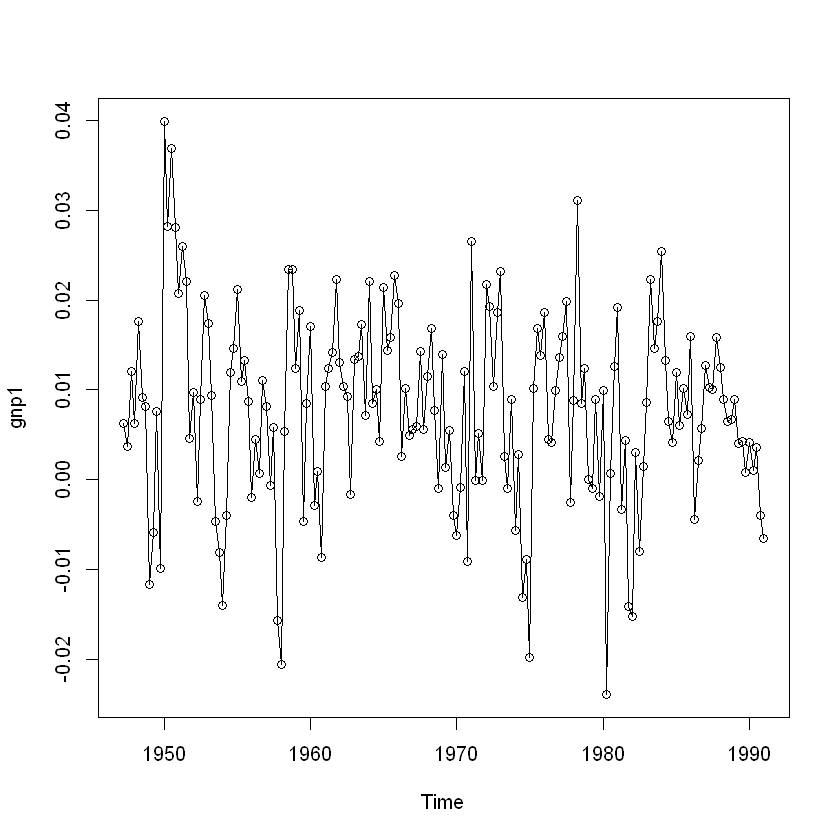

In [15]:
gnp=scan(file='dgnp82.txt')
gnp1=ts(gnp,frequency=4,start=c(1947,2))
plot(gnp1)
points(gnp1)

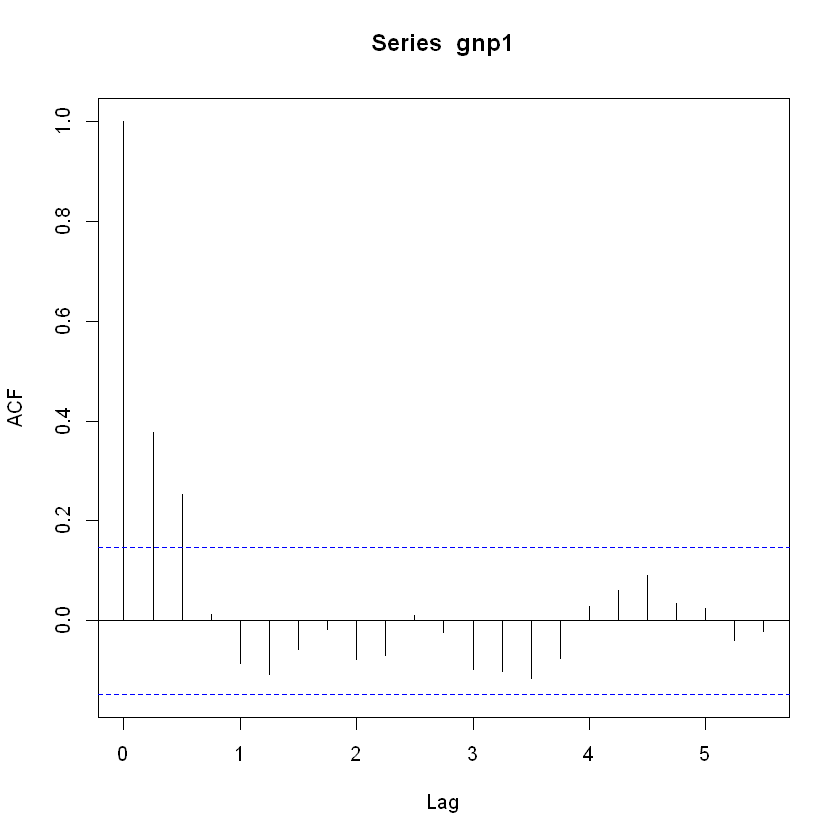

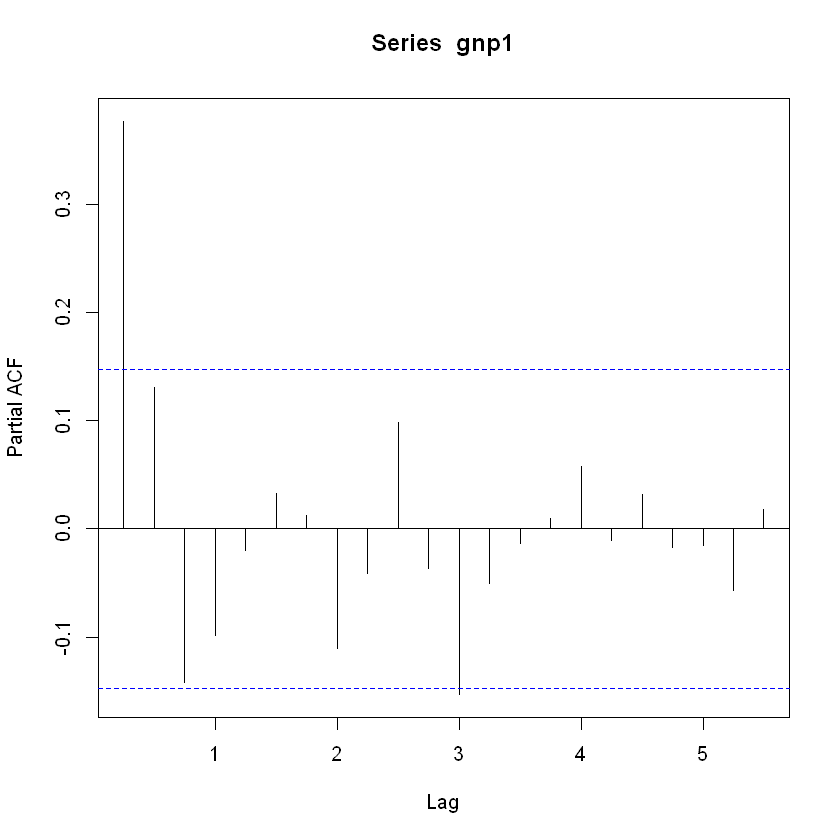

In [14]:
acf(gnp1)
pacf(gnp1)#偏自相关系数振荡衰减？

In [19]:
m1=ar(gnp,method='mle')#初步探索AR阶数
m1$aic
m1$order#对应aic最小的那个


[1] 3

0          1          2          3          4          5          6 
27.8466897  2.7416324  1.6032416  0.0000000  0.3027852  2.2426608  4.0520840 
         7          8          9         10         11         12 
 6.0254750  5.9046676  7.5718635  7.8953337  9.6788727  7.1975452

In [18]:
m2=arima(gnp,order=c(3,0,0))#利用初步探索的结果进行参数估计
m2
sqrt(m2$sigma2)#残差标准差


Call:
arima(x = gnp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.3480  0.1793  -0.1423     0.0077
s.e.  0.0745  0.0778   0.0745     0.0012

sigma^2 estimated as 9.427e-05:  log likelihood = 565.84,  aic = -1121.68

[1] 0.009709322

In [ ]:
p1=c(1,-m2$coef[1:3])#特征方程的系数
roots=polyroot(p1)#特征方程的根
roots
Mod(roots)
k=2*pi/acos(1.590253/1.913308)#计算经济周期的平均长度
k

In [28]:
data=read.table('d-ibm3dx7008.txt',header=T)
vw=data[,3]
#acf(vw)
#pacf(vw)
#m3_tmp=arima(vw,order=c(4,0,2))#结果不理想
#Box.test(m3_tmp$residuals,lag=12,type='Ljung')
#(ar(vw,method='mle'))$order#12
m3=arima(vw,order=c(12,0,0))#很可能存在过度拟合，尝试引入MA
m3
Box.test(m3$residuals,lag=12,type='Ljung')#d检查残差是否是一个白噪声#df=9的p-value：pv=1-pchisq(0.19409,9)=0.999999512374561
#ar5,ar6,ar7,ar8,ar9,ar10都不显著
m3=arima(vw,order=c(12,0,0),fixed=c(NA,NA,NA,NA,0,0,0,0,0,0,NA,NA,NA))#记住：不要遗漏常数项，即共有13个设定
m3
Box.test(m3$residuals,lag=12,type='Ljung')


Call:
arima(x = vw, order = c(12, 0, 0))

Coefficients:
         ar1      ar2     ar3      ar4      ar5     ar6      ar7     ar8
      0.0832  -0.0519  0.0264  -0.0231  -0.0093  0.0010  -0.0186  0.0100
s.e.  0.0101   0.0101  0.0101   0.0101   0.0101  0.0101   0.0101  0.0101
          ar9    ar10     ar11    ar12  intercept
      -0.0093  0.0054  -0.0212  0.0501      4e-04
s.e.   0.0101  0.0101   0.0101  0.0101      1e-04

sigma^2 estimated as 9.95e-05:  log likelihood = 31393.2,  aic = -62758.4


	Box-Ljung test

data:  m3$residuals
X-squared = 0.19409, df = 12, p-value = 1


Warning message in arima(vw, order = c(12, 0, 0), fixed = c(NA, NA, NA, NA, 0, 0, :
"some AR parameters were fixed: setting transform.pars = FALSE"


Call:
arima(x = vw, order = c(12, 0, 0), fixed = c(NA, NA, NA, NA, 0, 0, 0, 0, 0, 
    0, NA, NA, NA))

Coefficients:
         ar1      ar2     ar3      ar4  ar5  ar6  ar7  ar8  ar9  ar10     ar11
      0.0831  -0.0517  0.0270  -0.0242    0    0    0    0    0     0  -0.0199
s.e.  0.0101   0.0101  0.0101   0.0101    0    0    0    0    0     0   0.0101
        ar12  intercept
      0.0498      4e-04
s.e.  0.0101      1e-04

sigma^2 estimated as 9.955e-05:  log likelihood = 31390.47,  aic = -62764.94

In [30]:
#用acf和pacf来确定ARMA的阶数是不充分的，Tsay和Tiao(1984)提出了EACF判断ARMA阶数
library(TSA)
library(lmtest)
eacf(vw)#效果不显著，可能要引入异方差模型

Warning message:
"package 'TSA' was built under R version 3.3.3"Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.3.3"Loading required package: locfit
Warning message:
"package 'locfit' was built under R version 3.3.3"locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-16. For overview type 'help("mgcv-package")'.
Loading required package: tseries
Warning message:
"package 'tseries' was built under R version 3.3.3"
Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar

Warning message:
"package 'lmtest' was built under R version 3.3.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  x  o  o 
1 x o o x o o o o o o o  x  o  o 
2 x x o x o o o o o o o  x  x  o 
3 x x x x o o o o o o o  x  o  o 
4 x x x x o o o o o o o  x  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x x x x o x o o o o o  o  o  o 


In [45]:
library(tseries)#fUnitRoots包中有个adfTest()
data=read.table("q-gdpc96.txt",header=T)
gdp=log(data[,4])
dgdp=diff(gdp)*100
m1=ar(dgdp,method='mle')
m1$order
adf.test(gdp,k=10)#自动去除趋势成分
#adfTest(gdp,lags=10,type=c("c))
adf.test(dgdp,k=10)

[1] 3


	Augmented Dickey-Fuller Test

data:  gdp
Dickey-Fuller = -2.0217, Lag order = 10, p-value = 0.5667
alternative hypothesis: stationary


Warning message in adf.test(dgdp, k = 10):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  dgdp
Dickey-Fuller = -5.1622, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [47]:
jan=rep(c(1,rep(0,11)),39)
jan

[1] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 [38] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 [75] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[112] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
[149] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[186] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[223] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[260] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[297] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[334] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[371] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[408] 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
[445] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

[1] 468

[1] 1 1 2 3 4 5

[1] 0 0 0